# Chapter 9

In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import (RocCurveDisplay as ROC, accuracy_score)
from ISLP.models import ModelSpec as MS
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

## Exercise 4

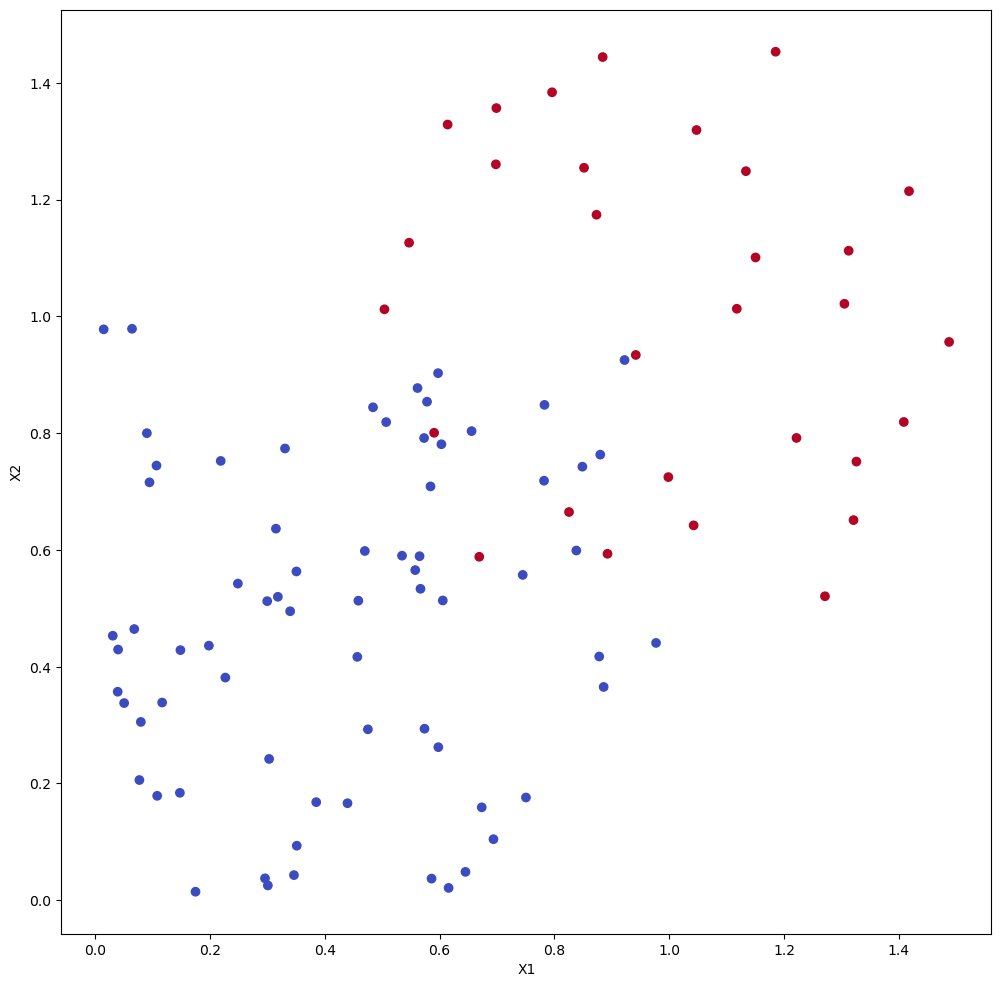

In [36]:
np.random.seed(10)
y=np.concatenate((np.ones(30),np.zeros(70)))#We implicitly defined two classes named 1 and 0 
#for 100 obs.
x=np.random.rand(100,2)#We prefer to modify values of x by adding or subtracting a random constant
# in order to have more distinguashable features
x[y==1] += 0.5#Choose the constant untill the exercise instruction is satisfied
fig,ax=subplots(figsize=(12,12))
ax.scatter(x[:,0],x[:,1],c=y,cmap=cm.coolwarm)
ax.set_xlabel('X1')
ax.set_ylabel('X2');

In [7]:
(X_train,X_test,y_train,y_test)=skm.train_test_split(x,y,test_size=0.5,random_state=11)

In [9]:
# Support vector classifier
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [10]:
confusion_table(y_train,svm_linear.predict(X_train))

Truth,0.0,1.0
Predicted,,
0.0,32,3
1.0,3,12


Training error found for SVC is 12%.

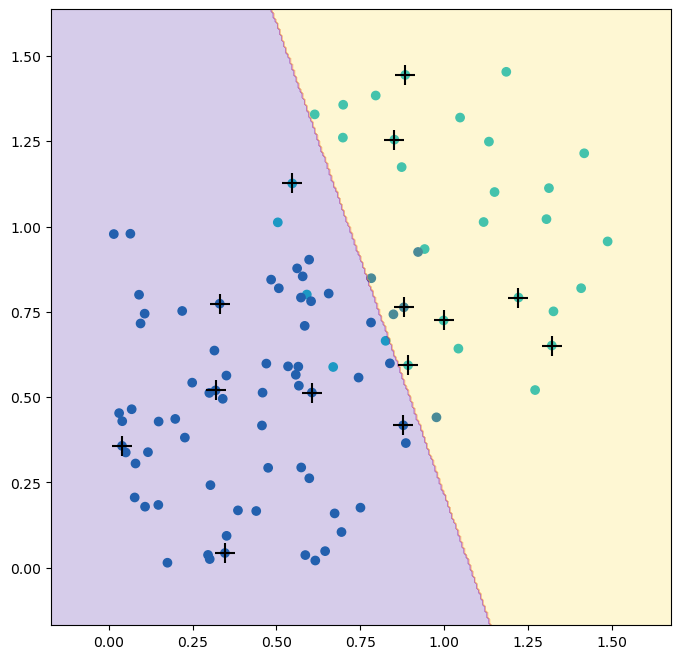

In [11]:
fig, ax = subplots(figsize=(8,8))
plot_svm(x,y,svm_linear,ax=ax);

In [18]:
#SVC polynomial
svm_poly = SVC(C=10, kernel='poly',degree=4)
svm_poly.fit(X_train, y_train)

SVC(C=10, degree=4, kernel='poly')

In [19]:
confusion_table(y_train,svm_poly.predict(X_train))

Truth,0.0,1.0
Predicted,,
0.0,33,2
1.0,3,12


Training error found for polynomial SVC is 10%.

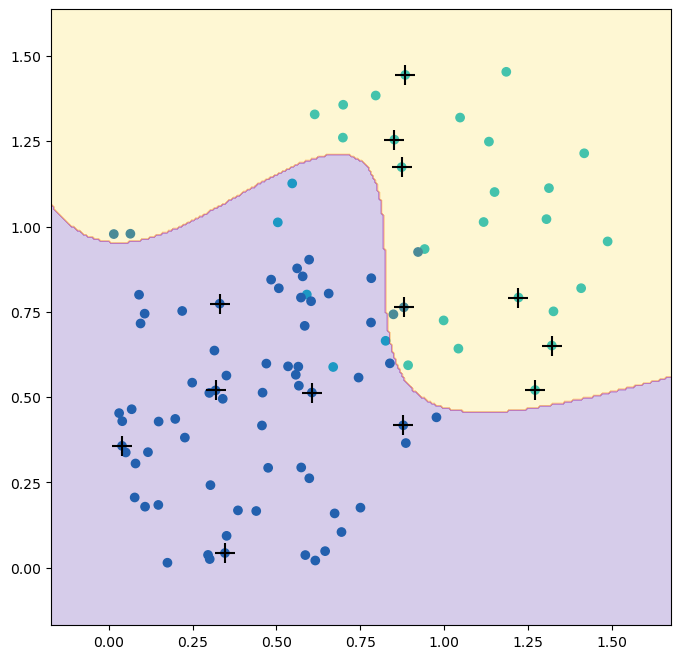

In [20]:
fig, ax = subplots(figsize=(8,8))
plot_svm(x,y,svm_poly,ax=ax);

In [31]:
#SVM rbf
svm_rbf = SVC(C=10, kernel='rbf',gamma=1.0)
svm_rbf.fit(X_train, y_train)

SVC(C=10, gamma=1.0)

In [32]:
confusion_table(y_train,svm_rbf.predict(X_train))

Truth,0.0,1.0
Predicted,,
0.0,32,3
1.0,3,12


Training error found for SVC is 12%.

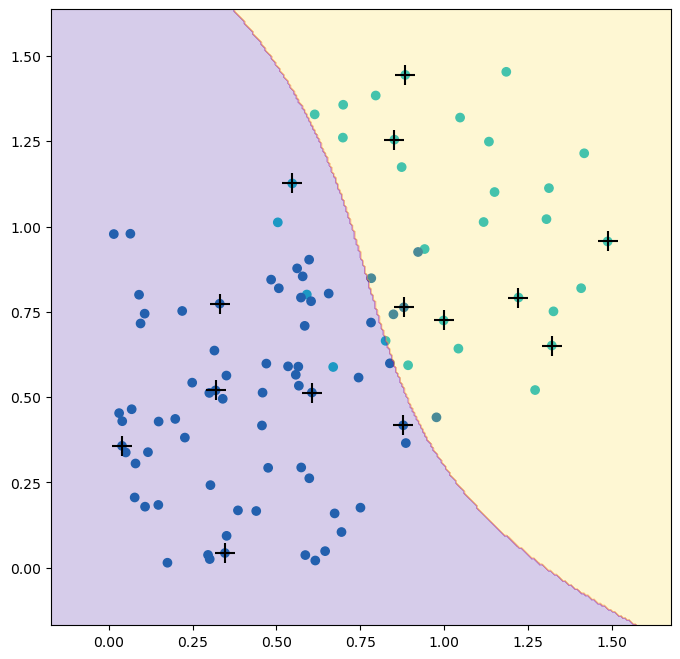

In [33]:
fig, ax = subplots(figsize=(8,8))
plot_svm(x,y,svm_rbf,ax=ax);

In [43]:
method=[svm_linear,svm_poly,svm_rbf]
Method=['SVC','SVC poly','SVM rbf']
df=pd.DataFrame({'Test error':[1-accuracy_score(y_test, i.predict(X_test)) for i in method]},
                index=Method)
df

,Test error
SVC,0.08
SVC poly,0.10
SVM rbf,0.08


The most performant models are SVC and SVM rbf with equal test errors of 8%.

## Exercise 5

### (a)

In [47]:
rng = np.random.default_rng (5)
x1 = rng.uniform(size =500) - 0.5
x2 = rng.uniform(size =500) - 0.5
y = x1**2 - x2**2 > 0
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})#Last line was added to prepare for logistic regression

### (b)

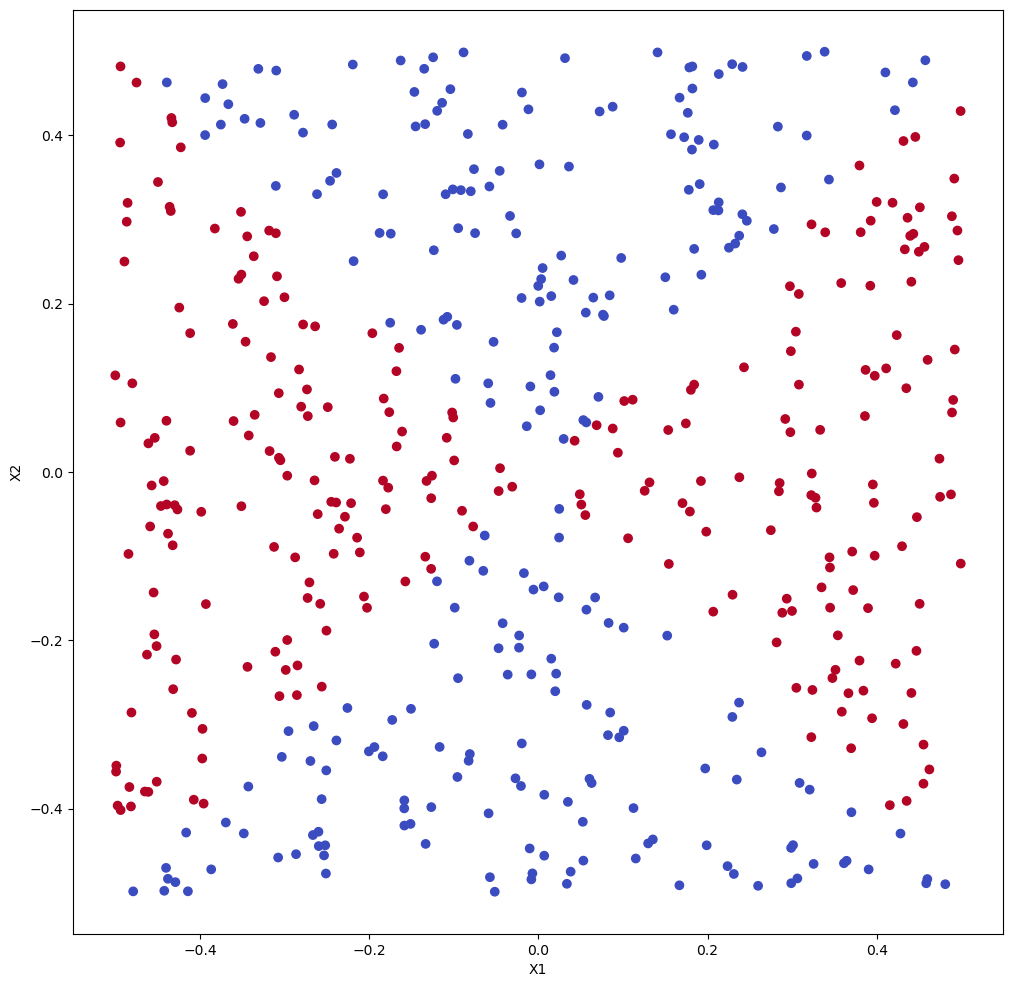

In [46]:
fig,ax=subplots(figsize=(12,12))
ax.scatter(x1,x2,c=y,cmap=cm.coolwarm)
ax.set_xlabel('X1')
ax.set_ylabel('X2');

### (c)

In [98]:
design = MS(df.iloc[:,0:2])
X = design.fit_transform(df)
glm = sm.GLM(y,X.values,family=sm.families.Binomial())
results = glm.fit()

### (d)

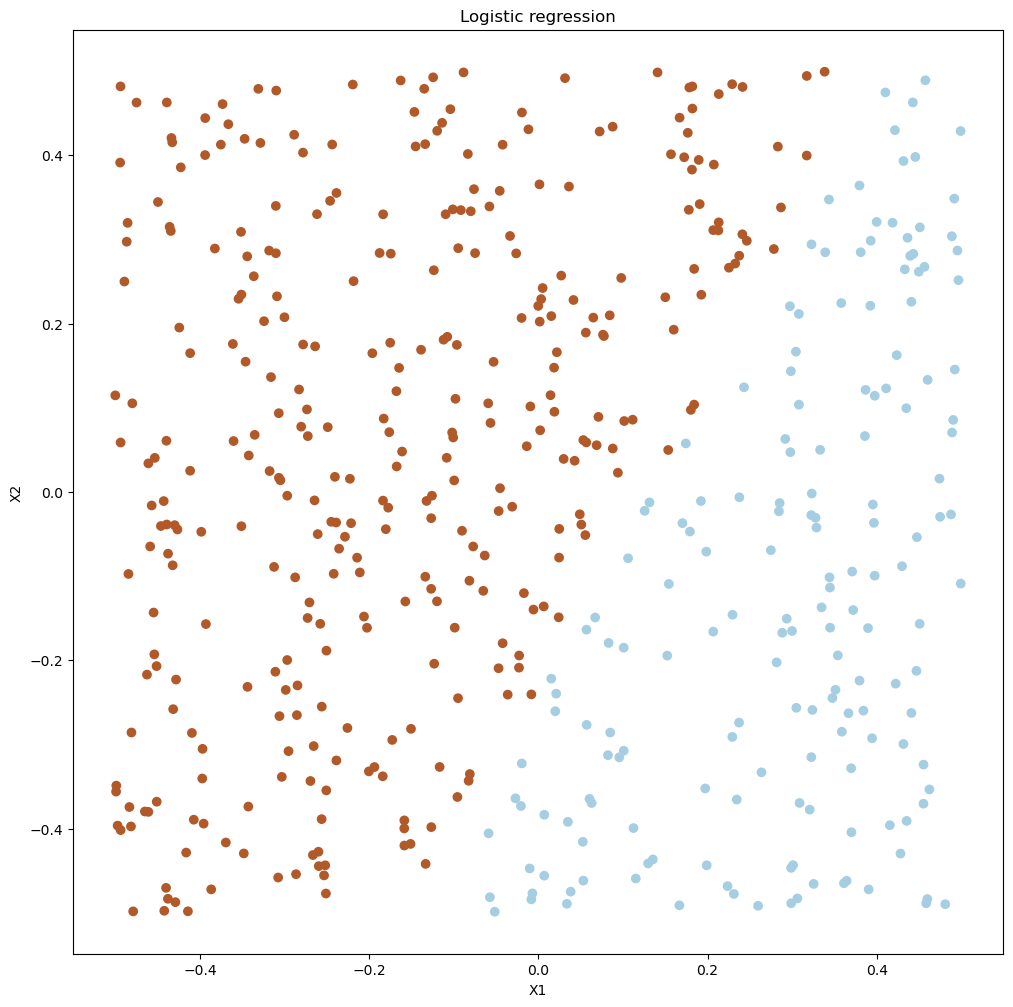

In [68]:
glm_pred = results.predict(X)
glm_dummy=np.where(glm_pred>0.5,True,False)
fig,ax=subplots(figsize=(12,12))
ax.scatter(x1,x2,c=glm_dummy,cmap=mpl.cm.Paired)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Logistic regression');

The decision boundary is indeed linear.

### (e)

In [74]:
#Add new dependant variables to the dataframe
df['x1new']=df['x1']**2
df['x1x2']=df['x1']*df['x2']
df['logx2']=np.log(np.abs(df['x2']))

In [97]:
design_new = MS(df.columns.drop('y'))#Recall the hierarchy principle. When X1*X2 are considered
# both X1 and X2 must be kept when fitting the model.
X_new = design_new.fit_transform(df)
glm_new = sm.GLM(y,X_new.values,family=sm.families.Binomial())
results_new = glm_new.fit()

### (f)

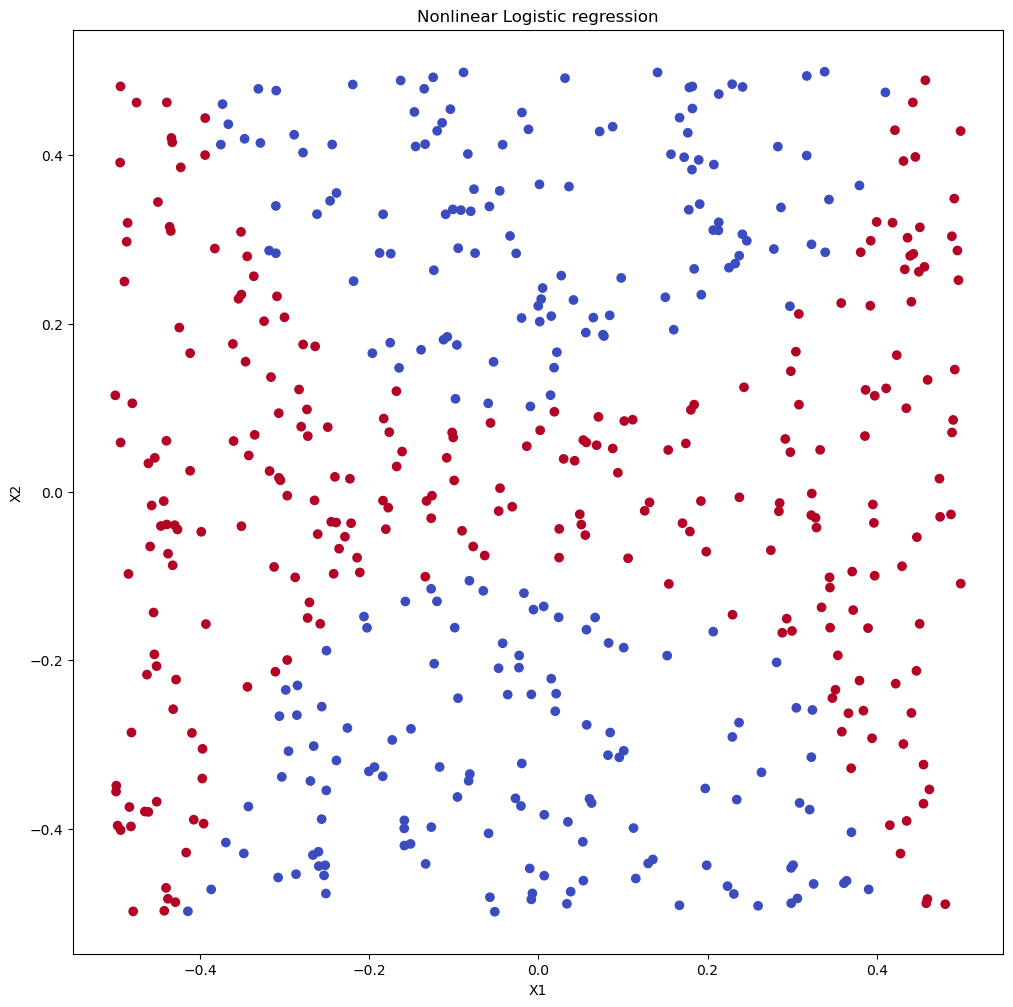

In [102]:
glm_pred = results_new.predict(X_new)
glm_dummy=np.where(glm_pred>0.5,True,False)
fig,ax=subplots(figsize=(12,12))
ax.scatter(x1,x2,c=glm_dummy,cmap=cm.coolwarm)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Nonlinear Logistic regression');

### (g)

In [81]:
svc_linear = SVC(C=10, kernel='linear')
svc_linear.fit(df.iloc[:,0:2].values, df['y'])

SVC(C=10, kernel='linear')

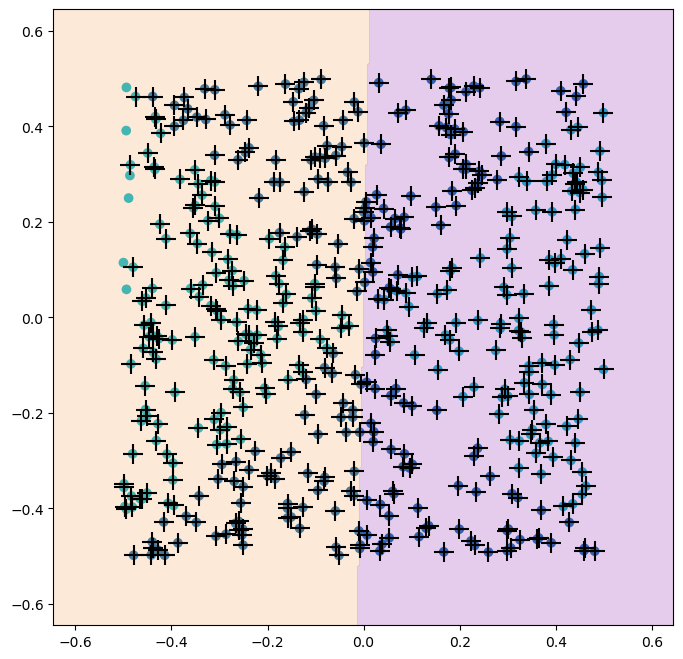

In [82]:
fig, ax = subplots(figsize=(8,8))
plot_svm(df.iloc[:,0:2],y,svc_linear,ax=ax);

### (f)

In [113]:
svc_poly = SVC(C=10, kernel='poly', degree=2)
svc_poly.fit(df.iloc[:,0:2].values, df['y'])

SVC(C=10, degree=2, kernel='poly')

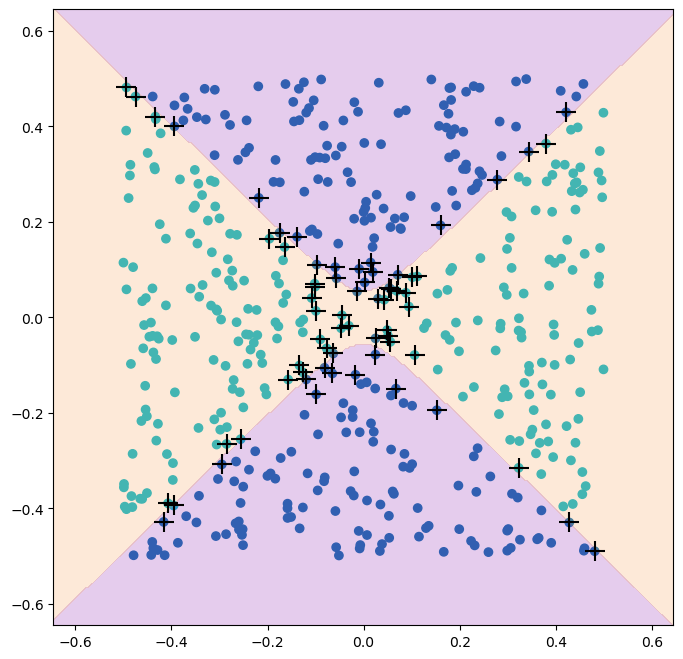

In [114]:
fig, ax = subplots(figsize=(8,8))
plot_svm(df.iloc[:,0:2],y,svc_poly,ax=ax);

### (i)

In [104]:
method=[results,results_new,svc_linear,svc_poly]
Method=['Linear logit','Nonlinear logit','SVC','SVC Poly']
Xs=[MS(df.iloc[:,0:2]).fit_transform(df).values,MS(df.columns.drop('y')).fit_transform(df).values,
    df.iloc[:,0:2].values,df.iloc[:,0:2].values]
Accuracy=pd.DataFrame({'Accuracy score':[accuracy_score(y, np.where(i.predict(Xi),True,False)) 
                                         for i,Xi in zip(method,Xs)]}, index=Method)
Accuracy

,Accuracy score
Linear logit,0.506
Nonlinear logit,0.506
SVC,0.512
SVC Poly,0.980


Performances of Linear logit and SVC are quite similar, although this latter is better.<br>
On the other hand SVM performs way better than Nonlinear logit.

## Exercise 6

### (a)

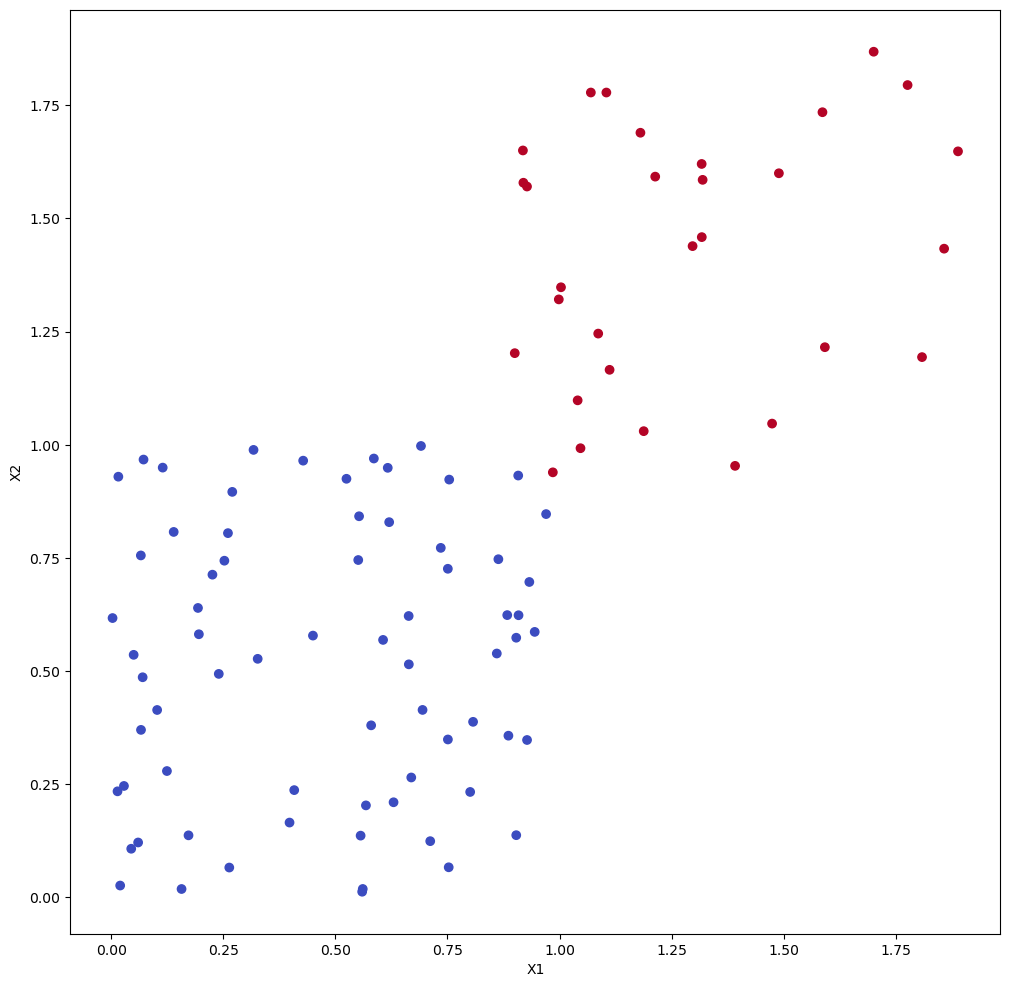

In [119]:
np.random.seed(1)
y=np.concatenate((np.ones(30),np.zeros(70)))
x=np.random.rand(100,2)#We prefer to modify values of x by adding or subtracting a random constant
# in order to have more distinguashable features
x[y==1] += 0.9#Choose the constant untill the exercise instruction is satisfied
fig,ax=subplots(figsize=(12,12))
ax.scatter(x[:,0],x[:,1],c=y,cmap=cm.coolwarm)
ax.set_xlabel('X1')
ax.set_ylabel('X2');

### (b)

In [121]:
C_param = [{'C': [0.1, 1, 10, 100, 1000]}]
grid = skm.GridSearchCV(SVC(kernel='linear'), C_param, cv=10, 
                        scoring='accuracy', return_train_score=True)
grid.fit(x, y)
grid.best_params_ 

{'C': 1}

In [137]:
train_CV=1-grid.cv_results_['mean_train_score']

In [138]:
train_CV

array([0.02555556, 0.01      , 0.00111111, 0.00777778, 0.        ])

In [139]:
number=[]
for c in [0.1, 1, 10, 100, 1000]:
    svc_linear = SVC(C=c, kernel='linear')
    svc_linear.fit(x, y)
    number.append(int((1-svc_linear.score(x,y))*100))

In [140]:
number

[2, 1, 0, 1, 0]

Best parameter based on training error is 10.

We notice that `number` is practically the conversion of `train_CV` to the number of classifications modulo the total number of observations.

### (c) and (d)

In [143]:
np.random.seed(11)
y_test=np.concatenate((np.ones(40),np.zeros(60)))
x_test=np.random.rand(100,2)#We prefer to modify values of x by adding or subtracting a random constant
# in order to have more distinguashable features
x_test[y==1] += 0.9

In [146]:
test_errors=[]
for c in [0.1, 1, 10, 100, 1000]:
    svc_linear = SVC(C=c, kernel='linear')
    svc_linear.fit(x, y)
    test_errors.append(1-svc_linear.score(x_test,y_test))

In [148]:
test_errors

[0.13, 0.10999999999999999, 0.12, 0.10999999999999999, 0.12]

Least test error is obtained for C=1. Thus, the best parameter obtained with test set is lower. But at the same time, test error parameter agrees with cross-validated one.

## Exercise 7

In [2]:
Auto=load_data("Auto")

### (a)

In [3]:
#mpg is the gas mileage evoked in the question
Auto['mpg01']=np.where(Auto['mpg']>np.median(Auto['mpg']),1,0)

### (b)

In [9]:
y=Auto['mpg01']

In [19]:
#Before fitting the grid we should do scaling on the continuous features
#This is justified as svm are based on distance computation: features with great values can
#dominate the kernel matrix and reduce the performance of the model
features_to_scale=Auto[['displacement','horsepower','weight','acceleration']]
scaled_features=StandardScaler().fit_transform(features_to_scale)
part1= pd.DataFrame(scaled_features, columns=['displacement','horsepower','weight','acceleration'])
part2= Auto[['cylinders','year','origin']].reset_index(drop=True)
X=pd.concat([part1,part2],axis=1)

In [70]:
svm_linear= SVC(C=10, kernel='linear')
kfold = skm.KFold(5,random_state=0,shuffle=True)
grid = skm.GridSearchCV(svm_linear,{'C':[0.001,0.01,0.1,1,5,10,100]},refit=True,cv=kfold,
                        scoring='accuracy')
grid.fit(X.values, y)
grid.best_estimator_

SVC(C=1, kernel='linear')

In [23]:
print('Reported cross-validation errors are',1-grid.cv_results_[('mean_test_score')])

Reported cross-validation errors are [0.13797468 0.09432003 0.09688413 0.08666018 0.09175592 0.08919182
 0.09172347]


We see that `C=1` results in the lowest cross-validation error of 8.66%. We also notice that the found minimal error is not shared with other values of `C`.

### (c)

In [68]:
#Let's tune the model in case of polynomial basis kernel both for C and degree values
svm_poly= SVC(C=10, kernel='poly')
grid_poly = skm.GridSearchCV(svm_poly,{'C':[0.001,0.01,0.1,1,5,10,100],
                                   'degree':[2,3,4,5]},refit=True,cv=kfold,
                        scoring='accuracy')
grid_poly.fit(X.values, y)
grid_poly.best_estimator_

SVC(C=100, degree=5, kernel='poly')

In [69]:
grid_poly.best_params_

{'C': 100, 'degree': 5}

Best parameters for polynomial basis kernel are `C=100 and degree=5`

In [72]:
#Now is the turn of rbf 
svm_rbf= SVC(C=10, kernel='rbf')
grid_rbf = skm.GridSearchCV(svm_linear,{'C':[0.001,0.01,0.1,1,5,10,100],'gamma':[0.5,1,2,3,4]},
                             refit=True,cv=kfold,scoring='accuracy')
grid_rbf.fit(X.values, y)
grid_rbf.best_estimator_

SVC(C=1, gamma=0.5, kernel='linear')

In [73]:
grid_rbf.best_params_

{'C': 1, 'gamma': 0.5}

Best parameters for RBF are `C=1 and gamma=0.5`

### (d)

In [46]:
X.shape

(392, 7)

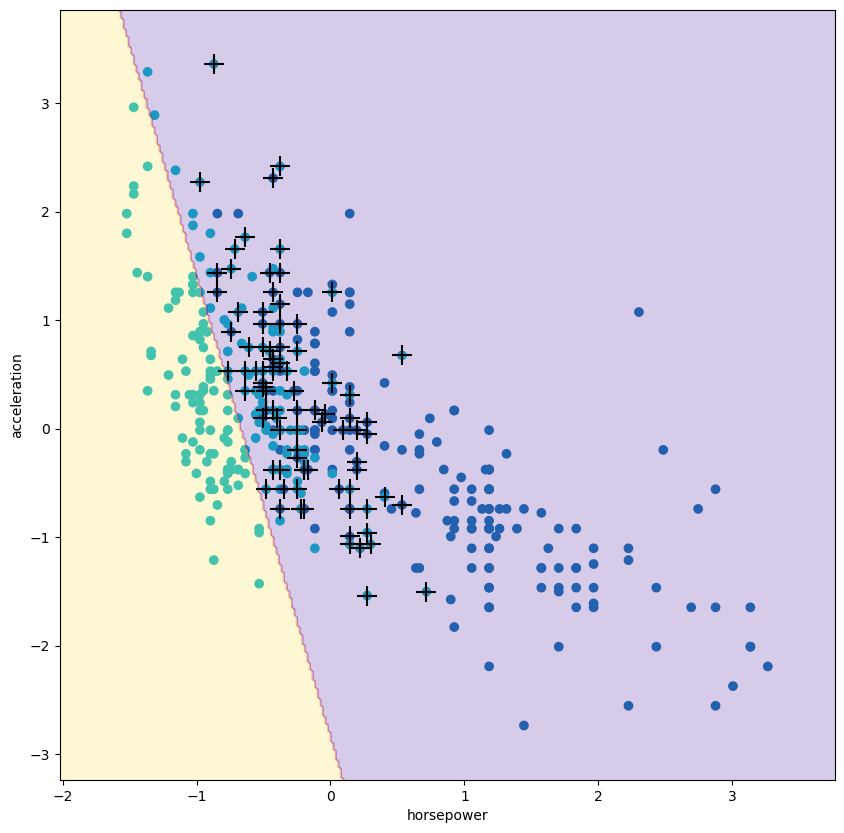

In [80]:
#Plot a linear boundary
fig, ax = subplots(figsize=(10,10))
plot_svm(X,y,grid.best_estimator_,features=(1,3),ax=ax)
ax.set_xlabel(X.columns[1])
ax.set_ylabel(X.columns[3]);

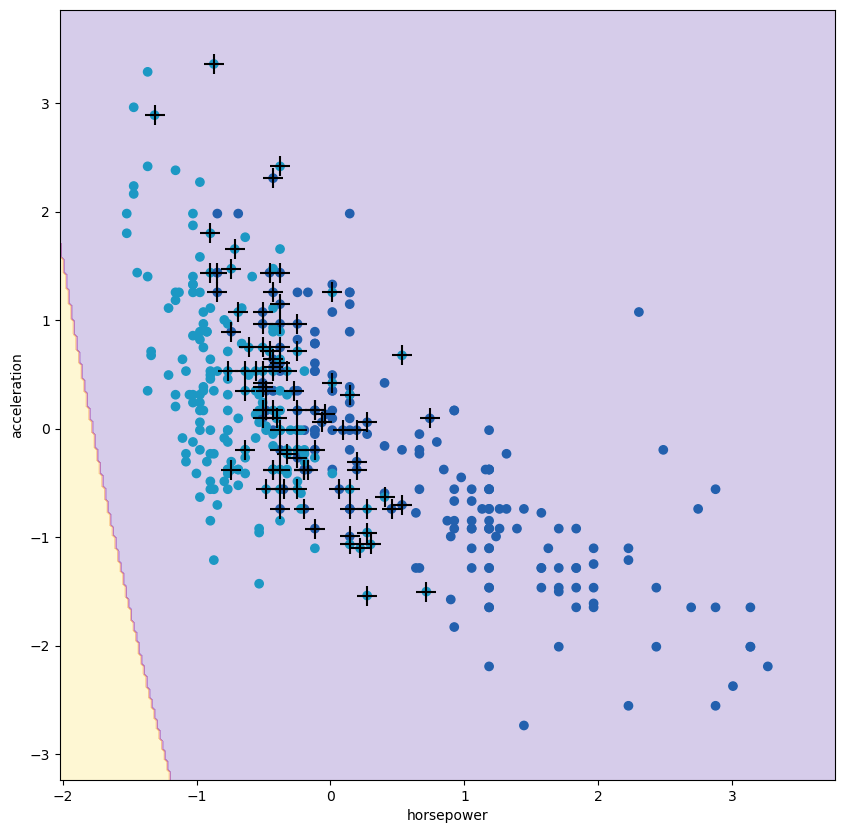

In [79]:
#Plot a poly boundary
fig, ax = subplots(figsize=(10,10))
plot_svm(X,y,grid_poly.best_estimator_,features=(1,3),ax=ax)
ax.set_xlabel(X.columns[1])
ax.set_ylabel(X.columns[3]);

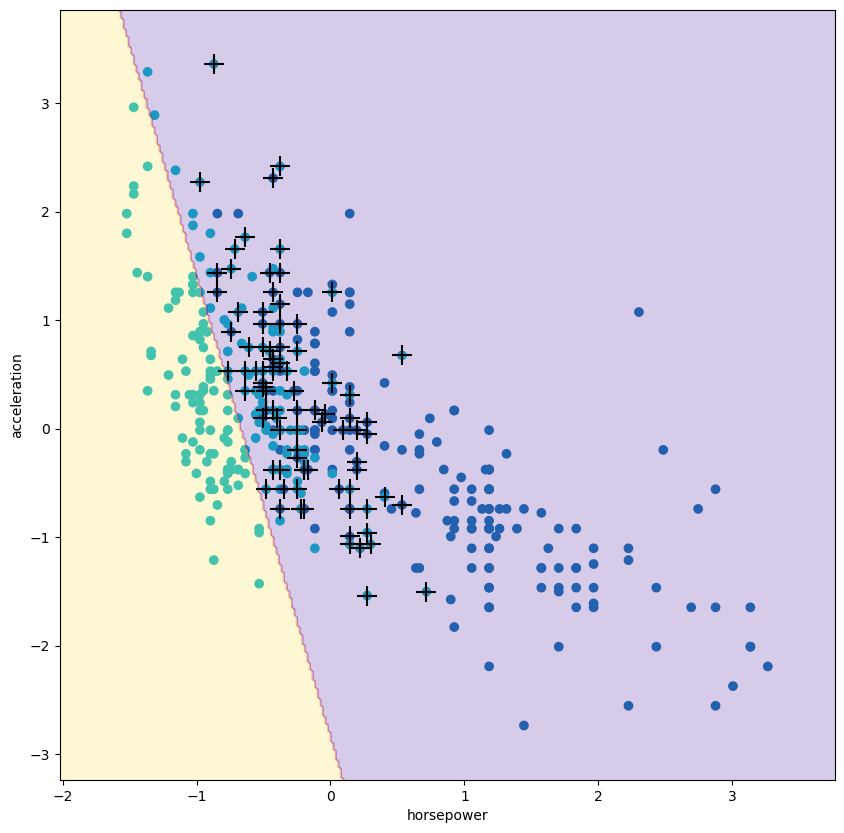

In [78]:
#Plot an rbf boundary
fig, ax = subplots(figsize=(10,10))
plot_svm(X,y,grid_rbf.best_estimator_,features=(1,3),ax=ax)
ax.set_xlabel(X.columns[1])
ax.set_ylabel(X.columns[3]);

The use of features as suggested in the instructions does not give a comprehensive pictures of the boundaries since there are multiples features. It is suggested to reduce the dimensionality of components instead using PCA.

## Exercise 8

### (a)

In [81]:
OJ=load_data('OJ')

In [85]:
OJ['Store7']=np.where(OJ['Store7']=='Yes',1,0)

In [86]:
training,test=skm.train_test_split(OJ,train_size=800,random_state=11)

### (b)

In [94]:
X_training=training.iloc[:,1:]
y_train=training['Purchase']

In [107]:
#We should do scaling on the continous features as for the previous exercise
features_no_scale=['StoreID', 'SpecialCH', 'SpecialMM', 'Store7', 'STORE']
features_to_scale=X_training[X_training.columns.difference(features_no_scale)]
scaled_features=StandardScaler().fit_transform(features_to_scale)
part1= pd.DataFrame(scaled_features, columns=X_training.columns.difference(features_no_scale))
part2= X_training[features_no_scale].reset_index(drop=True)
X_train=pd.concat([part1,part2],axis=1)

In [110]:
svm_linear= SVC(C=0.01, kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [111]:
svm_linear.n_support_

array([218, 217])

There are $218+217=435$ support vectors, 218 observations among them belong to CH class.

### (c)

In [112]:
#First, we should do scaling on the test size as well
X_testing=test.iloc[:,1:]
y_test=test['Purchase']
features_to_scale=X_testing[X_testing.columns.difference(features_no_scale)]
scaled_features=StandardScaler().fit_transform(features_to_scale)
part1= pd.DataFrame(scaled_features, columns=X_testing.columns.difference(features_no_scale))
part2= X_testing[features_no_scale].reset_index(drop=True)
X_test=pd.concat([part1,part2],axis=1)

In [114]:
test_error=1-svm_linear.score(X_test,y_test)
train_error=1-svm_linear.score(X_train,y_train)

In [115]:
print('Training error fot the linear support vector classifier is',train_error)
print('Test error fot the linear support vector classifier is',test_error)


Training error fot the linear support vector classifier is 0.17374999999999996
Test error fot the linear support vector classifier is 0.18148148148148147


### (d)

In [119]:
kfold = skm.KFold(5,random_state=0,shuffle=True)
grid_linear = skm.GridSearchCV(svm_linear,{'C':[0.01,0.1,1,10]},refit=True,cv=kfold,scoring='accuracy')
grid_linear.fit(X_train.values, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=0.01, kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='accuracy')

In [120]:
print('The best tuning parameter is',grid_linear.best_params_)

The best tuning parameter is {'C': 1}


### (e)

In [122]:
best_estimator=grid_linear.best_estimator_
best_test_error=1-best_estimator.score(X_test.values,y_test)
best_train_error=1-best_estimator.score(X_train.values,y_train)

In [123]:
print('Training error fot the linear support vector classifier with the best tuning\
      parameter is',best_train_error)
print('Test error fot the linear support vector classifier with the best tuning\
      parameter is',best_test_error)

Training error fot the linear support vector classifier with the best tuning      parameter is 0.15625
Test error fot the linear support vector classifier with the best tuning      parameter is 0.18148148148148147


### (f)

In [124]:
#Fit SVM with RBF and C=0.01
svm_rbf1= SVC(C=0.01, kernel='rbf')
svm_rbf1.fit(X_train, y_train)

SVC(C=0.01)

In [125]:
#compute test error and training error
test_error_rbf=1-svm_rbf1.score(X_test,y_test)
train_error_rbf=1-svm_rbf1.score(X_train,y_train)

In [126]:
print('Training error for the SVM wtih C=0.01 is',train_error_rbf)
print('Test error for the SVM wtih C=0.01 is',test_error_rbf)

Training error for the SVM wtih C=0.01 is 0.38249999999999995
Test error for the SVM wtih C=0.01 is 0.4111111111111111


In [130]:
grid_rbf = skm.GridSearchCV(svm_rbf1,{'C':[0.01,0.1,1,10,100]},refit=True,cv=kfold,scoring='accuracy')
grid_rbf.fit(X_train.values, y_train)
print('The best tuning parameter is',grid_rbf.best_params_)

The best tuning parameter is {'C': 10}


In [131]:
svm_rbf_best=grid_rbf.best_estimator_
rbf_best_test_error=1-svm_rbf_best.score(X_test.values,y_test)
rbf_best_train_error=1-svm_rbf_best.score(X_train.values,y_train)

In [132]:
print('Training error for the rbf SVM with the best tuning parameter is',rbf_best_train_error)
print('Test error for the rbf SVM with the best tuning parameter is',rbf_best_test_error)

Training error for the rbf SVM with the best tuning parameter is 0.14625
Test error for the rbf SVM with the best tuning parameter is 0.18888888888888888


### (g)

In [133]:
#Fit SVM with polynomial kernel of degree=2 and C=0.01
svm_poly1= SVC(C=0.01, kernel='poly',degree=2)
svm_poly1.fit(X_train, y_train)

SVC(C=0.01, degree=2, kernel='poly')

In [134]:
#compute test error and training error
test_error_poly=1-svm_poly1.score(X_test,y_test)
train_error_poly=1-svm_poly1.score(X_train,y_train)

In [135]:
print('Training error for the SVM wtih C=0.01 and polynomial kernel is',train_error_poly)
print('Test error for the SVM wtih C=0.01 and polynomial kernel is',test_error_poly)

Training error for the SVM wtih C=0.01 and polynomial kernel is 0.38249999999999995
Test error for the SVM wtih C=0.01 and polynomial kernel is 0.4111111111111111


In [136]:
grid_poly = skm.GridSearchCV(svm_poly1,{'C':[0.01,0.1,1,10,100]},refit=True,
                             cv=kfold,scoring='accuracy')
grid_poly.fit(X_train.values, y_train)
print('The best tuning parameter is',grid_poly.best_params_)

The best tuning parameter is {'C': 10}


In [137]:
svm_poly_best=grid_poly.best_estimator_
poly_best_test_error=1-svm_poly_best.score(X_test.values,y_test)
poly_best_train_error=1-svm_poly_best.score(X_train.values,y_train)

In [138]:
print('Training error for the SVM with a polynomial kernel and the best\
tuning parameter is',poly_best_train_error)
print('Test error for the SVM with a polynomial kernel and the best\
tuning parameter is',poly_best_test_error)

Training error for the SVM with a polynomial kernel and the besttuning parameter is 0.14625
Test error for the SVM with a polynomial kernel and the besttuning parameter is 0.18518518518518523


### (h)

By comparing values of the best test errors obtained, we conclude that the three used kernels are practicailly identical with a slight preference for the linear decsion boundary with an error of 18.15%. 